## Project Stage - III (Distributions and Hypothesis Testing)

#### Raveena Arasikere Rakesh

## Goals

The goal of Stage III is to develop advanced data for modeling for comparative analysis and hypothesis testing. 

### Tasks:

#### Task 1: Distribution Analysis (50 pts)     
- Member: (50 pts)
    - **M1.1** Compare NC and KY on Opioid Mortality - 2019 Data (20 pts)
         - Create histograms for NC and KY for Opioid Mortality (Normalized Mortality Rate)
         - Merge them into a single graph
         - Plot mean lines for both the histograms
         - Example below

In [231]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
from scipy.stats import poisson
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
superdf=pd.read_csv('../data/finaldf-raveena.csv')
# dropping few of the unnecessary columns from the super dataframe
superdf["Norm_Deaths"] = round(superdf["Norm_Deaths"]) #rounding the normalised deaths
superdf=superdf.drop(columns=['State_y'])
superdf=superdf.rename(columns={"State_x":"State"})
superdf.head()

,Unnamed: 0,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,...,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,FIPS,Opiod_Dispensing_Rate
0,0,"Abbeville County, SC",45001,535389,38,7.0,45.0,1.0,45001.0,SC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45001.0,32.4
1,1,"Acadia Parish, LA",22001,1279727,98,8.0,22.0,1.0,22001.0,LA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22001.0,32.2
2,2,"Accomack County, VA",51001,726189,50,7.0,51.0,1.0,51001.0,VA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51001.0,19.4
3,3,"Ada County, ID",16001,8083452,692,9.0,16.0,1.0,16001.0,ID,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16001.0,60.8
4,4,"Adair County, KY",21001,387950,43,11.0,21.0,1.0,21001.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21001.0,71.3


In [175]:
nc_data=superdf[superdf['State']=='NC']
nc_data_mean=nc_data['Norm_Deaths'].mean()
nc_data_median=nc_data['Norm_Deaths'].median()
print("Mean of mortality across NC:",nc_data_mean)
print("Median of mortality across NC",nc_data_median)

Mean of mortality across NC: 12.1010101010101
Median of mortality across NC 12.0


In [176]:
ky_data=superdf[superdf['State']=='KY']
ky_data_mean=ky_data['Norm_Deaths'].mean()
ky_data_median=ky_data['Norm_Deaths'].median()
print("Mean of mortality across KY:",ky_data_mean)
print("Median of mortality across KY",ky_data_median)

Mean of mortality across KY: 18.112068965517242
Median of mortality across KY 16.0


In [177]:
nc_ky_df=superdf[superdf['State'].isin(["NC","KY"])]
nc_ky_df

,Unnamed: 0,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,...,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,FIPS,Opiod_Dispensing_Rate
4,4,"Adair County, KY",21001,387950,43,11.0,21.0,1.0,21001.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21001.0,71.3
20,20,"Alamance County, NC",37001,3109711,318,10.0,37.0,1.0,37001.0,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37001.0,34.2
29,29,"Alexander County, NC",37003,760950,99,13.0,37.0,3.0,37003.0,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37003.0,6.0
36,36,"Alleghany County, NC",37005,229301,25,11.0,37.0,5.0,37005.0,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37005.0,39.9
41,41,"Allen County, KY",21003,411770,54,13.0,21.0,3.0,21003.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21003.0,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2467,"Wilson County, NC",37195,1657255,128,8.0,37.0,195.0,37195.0,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37195.0,34.0
2485,2485,"Wolfe County, KY",21237,150925,49,32.0,21.0,237.0,21237.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21237.0,79.1
2492,2492,"Woodford County, KY",21239,519121,79,15.0,21.0,239.0,21239.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21239.0,32.7
2507,2507,"Yadkin County, NC",37197,789496,127,16.0,37.0,197.0,37197.0,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37197.0,28.6


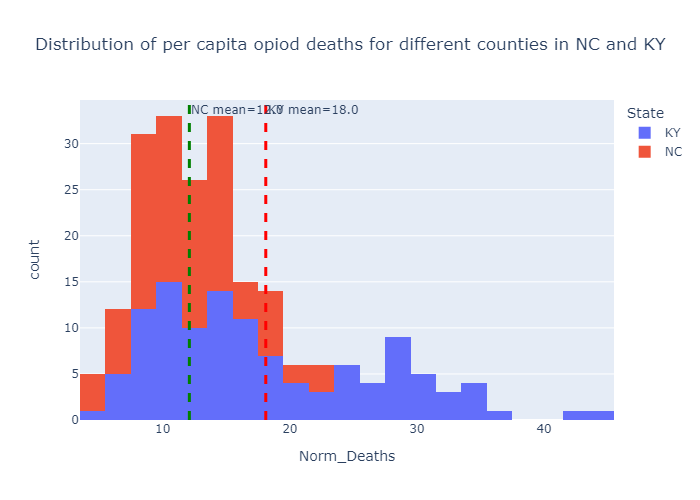

In [287]:
import plotly.express as px
import numpy as np
fig = px.histogram(nc_ky_df, x="Norm_Deaths", color="State",title="Distribution of per capita opiod deaths for different counties in NC and KY")
fig.add_vline(nc_data_mean, line_width=3, line_dash="dash", line_color="green",name="Mean",annotation_text="NC mean="+str(np.round(nc_data_mean)))
fig.add_vline(ky_data_mean, line_width=3, line_dash="dash", line_color="red",name="Mean",annotation_text="KY mean="+str(np.round(ky_data_mean)))
fig.show("png")

- **M1.2** Evaluate a distribution for the Normalized Mortality Rate (20 pts)
        - Choose a distribution for Normalized Mortality Rate
            - Provide explanation of your choice
        - Develop distribution estimator with - Method of Moments (MoM), Maximum Likelihood (MLE), and Kernel Density Estimation (KDE)
        - Plot the distribution estimations over the histograms
            - Each should be color coded on the graph and described for their parameters
            - Discuss which estimator works the best and why
        - Example below

* Since the mean and median are almost same for the NC data but the mortality rate across the dataset is rounded and hence it can be considered it as a discrete distribution.We assume it to be a <b>Poisson distribution</b> and try to fit the data using the mean and standard deviation which are the estimation parameters for the poisson distribution.

In [202]:
nc_data_std=nc_data['Norm_Deaths'].std()
print("The standard deviation of NC data is:",nc_data_std)
print("The mean of NC data is:",np.round(nc_data_mean,5))

The standard deviation of NC data is: 4.229379627145
The mean of NC data is: 12.10101


* In order to set a linespace to genearte a continous function we need to calculate the min and the max of the deaths rates across NC

In [180]:
# we calculate the min and max to set a linespace for the normal distribution
print(nc_data['Norm_Deaths'].min())
print(nc_data['Norm_Deaths'].max())

4.0
23.0


* Once we have both the min and max of the death values across the NC state, we use these values as the scale parameters to  plot the "Method of Moments" and "Maximum likelihood estimate"

Text(0.5, 1.0, 'Method of Moments for NC')

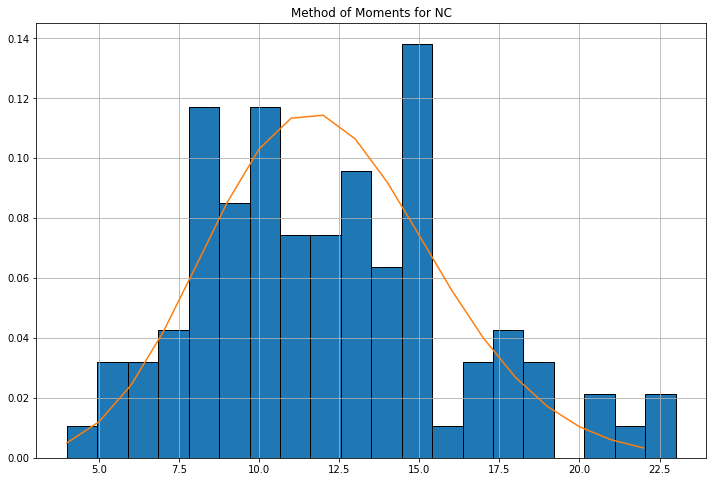

In [213]:
nc_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
#using the min and max as the scale
x = np.arange(4, 23)
pmf=poisson.pmf(x,mu=nc_data_mean)
plt.plot(x, pmf)
#plt.plot(np.linspace(1, 25), poisson.pmf(np.linspace(1, 24), nc_data_mean, nc_data_std))
plt.title("Method of Moments for NC")

* Poisson distribution uses, mean as the estimation parameter.Since, the mean value across the entire distribution is going to remain same and the standard mean used for MLE is also going to be the same, <b>Method of methods(MOM) and Maximum likelihood estimation(MLE) for a poisson distribution is going to be the same</b>, it can be verified by plotting the graph.

Text(0.5, 1.0, 'Maximum likelihood for NC data')

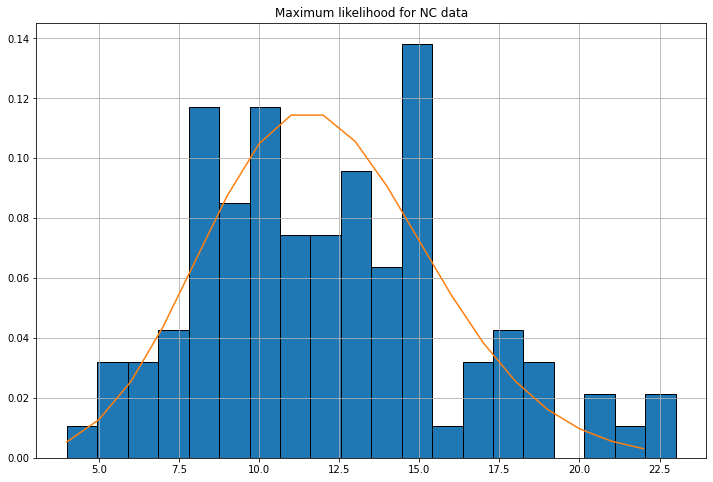

In [214]:
nc_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.arange(4, 23)
pmf=poisson.pmf(x,mu=12.0)#using the standard mean to plot the MLE
plt.plot(x, pmf)
plt.title("Maximum likelihood for NC data")

Text(0.5, 1.0, 'KDE for NC data')

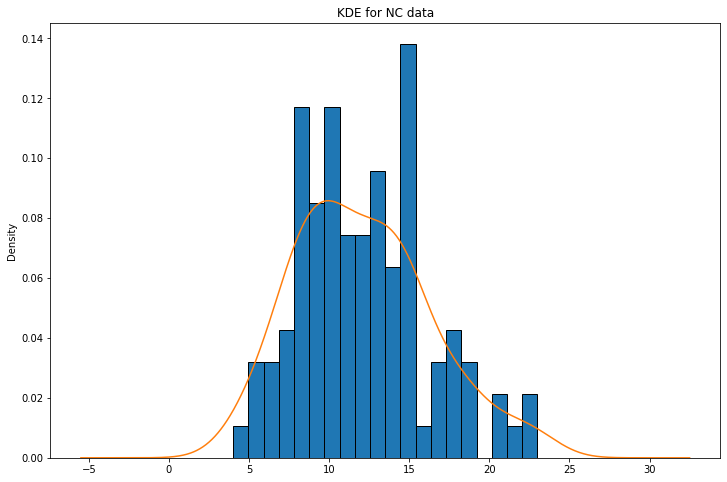

In [23]:
nc_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
nc_data['Norm_Deaths'].plot.kde()
plt.title("KDE for NC data")

* Now Plotting all 3 in a single plot.

Text(0.5, 1.0, 'MLe,MOM,KDE for NC, red curve indicates the KDE')

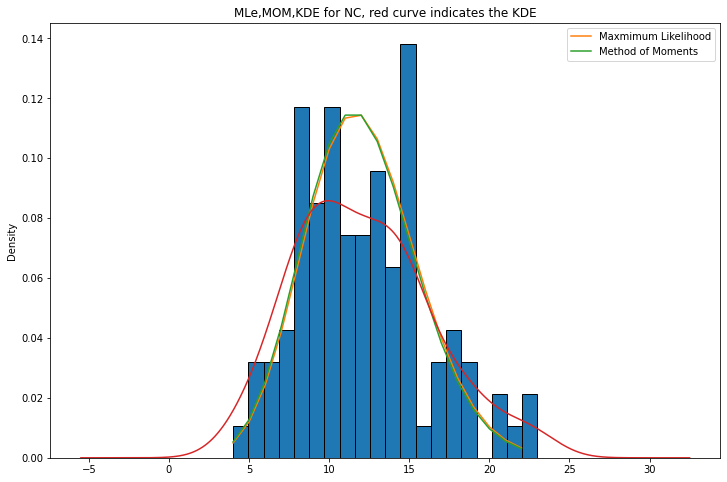

In [215]:
nc_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
#using the min and max as the scale
x = np.arange(4, 23)
pmf=poisson.pmf(x,mu=nc_data_mean)
pmf1=poisson.pmf(x,mu=12.0)

l1,=plt.plot(x, pmf,label='Maxmimum Likelihood')
l2,=plt.plot(x,pmf1,label="Method of Moments")
nc_data['Norm_Deaths'].plot.kde()
plt.legend(handles=[l1,l2])
plt.title("MLe,MOM,KDE for NC, red curve indicates the KDE")

##### From the above genearted curve we can see that method of moments and the most likelihood estimate remains the same for both a poisson distribution and hence it is proved using the graph,also both of them act as a good fit for the graph and generates a best fit curve and hence we choose mom/mle as the best fit curve for the NC data 


### KY Data analysis

In [222]:
ky_data_std=ky_data['Norm_Deaths'].std()
print("The standard deviation of KY data is:",ky_data_std)
print("The mean of KY data is:",ky_data_mean)

The standard deviation of KY data is: 8.856117072126048
The mean of KY data is: 18.112068965517242


In [223]:
print(ky_data['Norm_Deaths'].min())
print(ky_data['Norm_Deaths'].max())

5.0
44.0


Text(0.5, 1.0, 'Method of Moments for KY data')

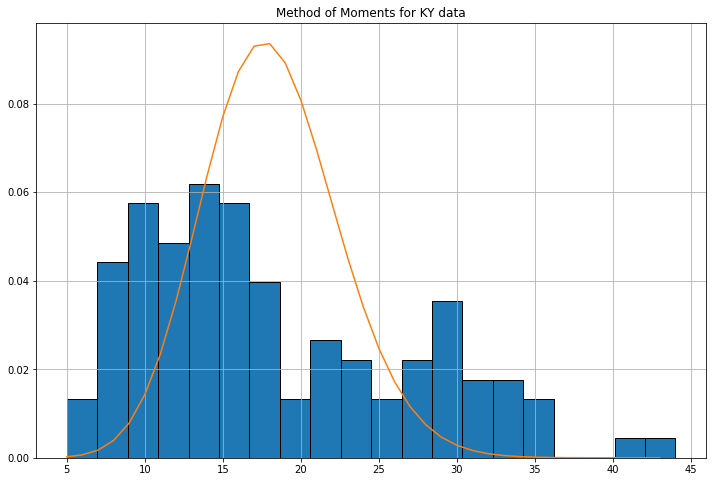

In [226]:
ky_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
#using the min and max as the scale
x = np.arange(5, 44)
pmf=poisson.pmf(x,mu=ky_data_mean)
plt.plot(x, pmf)
plt.title("Method of Moments for KY data")

* Since, we already know that the MOM and MLE are going to be the same, we just continue to plot the KDE and the compare for the best fit.

Text(0.5, 1.0, 'KDE for KY data')

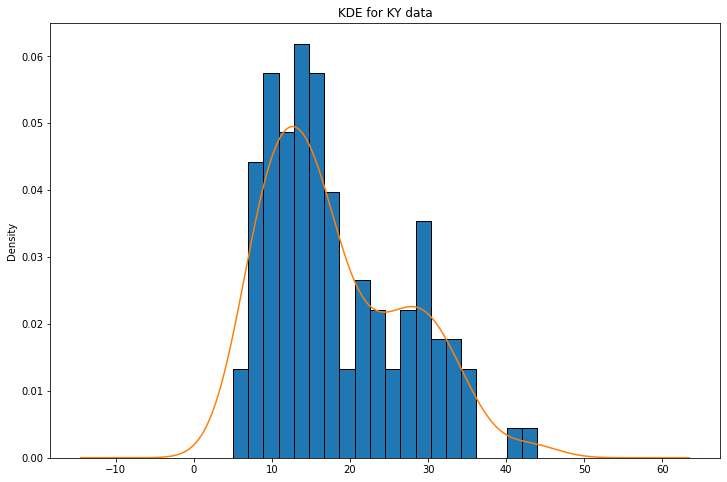

In [219]:
ky_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
ky_data['Norm_Deaths'].plot.kde()
plt.title("KDE for KY data")

Text(0.5, 1.0, 'MLe,MOM,KDE for KY, red curve indicates the KDE')

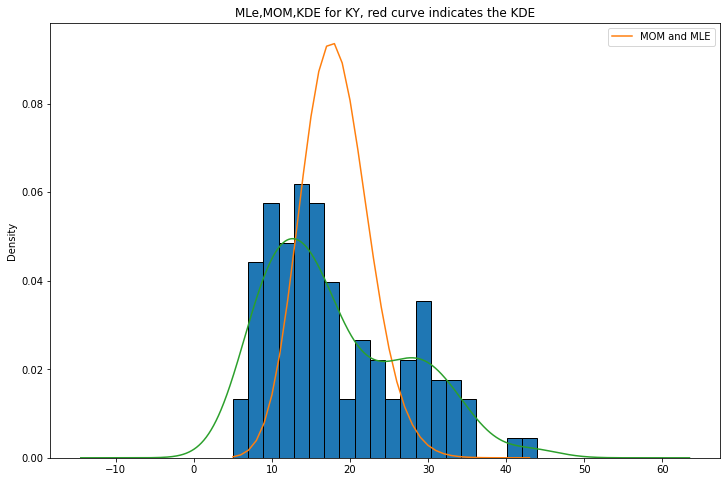

In [227]:
ky_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.arange(5, 44)
pmf=poisson.pmf(x,mu=ky_data_mean)

l1,=plt.plot(x, pmf,label='MOM and MLE')
ky_data['Norm_Deaths'].plot.kde()
plt.legend(handles=[l1])
plt.title("MLe,MOM,KDE for KY, red curve indicates the KDE")

##### From the above genearted curve we can see that KDE generates a best fit curve and hence we choose KDE as the best fit curve for the KY data 


### Plotting both the NC data and the KY data in a single plot

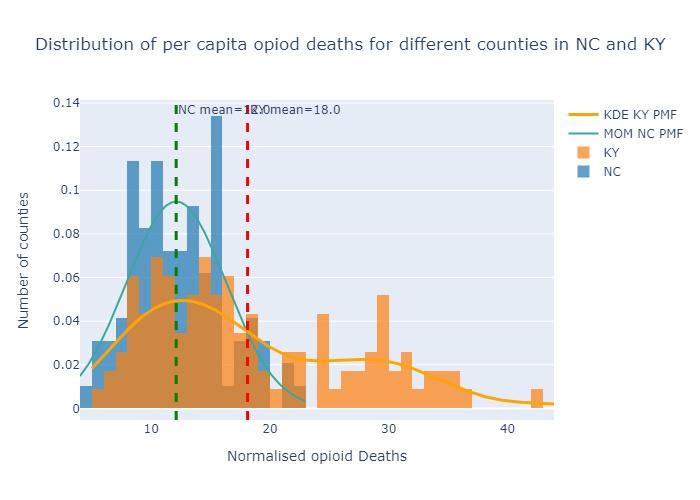

In [286]:
import plotly.graph_objects as go
hist_data = [nc_data['Norm_Deaths'],ky_data['Norm_Deaths']]
hist_data2=[ky_data['Norm_Deaths']]

group_labels = ['NC','KY']
group_labels2=['KY']
#colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_rug=False,show_curve=False)
fig3=ff.create_distplot([nc_data['Norm_Deaths']], ['NC'], show_rug=False,curve_type='normal')
normal_x1 = fig3.data[1]['x']
normal_y1 = fig3.data[1]['y']
fig.add_traces(go.Scatter(x=normal_x1, y=normal_y1, mode = 'lines',
                          line = dict(color='#37AA9C',width = 2),name = 'MOM NC PMF'))


fig2 = ff.create_distplot(hist_data2, group_labels2, curve_type = 'kde')
normal_x = fig2.data[1]['x']
normal_y = fig2.data[1]['y']
fig.add_traces(go.Scatter(x=normal_x, y=normal_y, mode = 'lines',
                          line = dict(color='orange',width = 3), name = 'KDE KY PMF'))

fig.add_vline(nc_data_mean, line_width=3, line_dash="dash", line_color="green",name="Mean",annotation_text="NC mean="+str(np.round(nc_data_mean)))
fig.add_vline(ky_data_mean, line_width=3, line_dash="dash", line_color="red",name="Mean",annotation_text="KY mean="+str(np.round(ky_data_mean)))

# Add title
fig.update_layout(title_text='Distribution of per capita opiod deaths for different counties in NC and KY',xaxis_title="Normalised opioid Deaths",
    yaxis_title="Number of counties")
fig.show("png")

   - **M1.3** Select the top two states identified in Stage I and recreate the M1.2 task (10 pts)
         - Discuss the results
         
 ###### The top 2 states identified in stage-1 were WV and NM , performing the same data analysis on the two 

In [257]:
wv_data=superdf[superdf['State']=='WV']
wv_data_mean=wv_data['Norm_Deaths'].mean()
wv_data_median=wv_data['Norm_Deaths'].median()
wv_data_std=wv_data['Norm_Deaths'].std()
print("Mean of mortality across WV:",wv_data_mean)
print("Median of mortality across WV",wv_data_median)
print("Standard deviation across WV",wv_data_std)

wv_data_min=wv_data['Norm_Deaths'].min()
wv_data_max=wv_data['Norm_Deaths'].max()
print("The min value for WV",wv_data_min)
print("The min value for WV",wv_data_max)

Mean of mortality across WV: 20.18867924528302
Median of mortality across WV 17.0
Standard deviation across WV 12.238112919786515
The min value for WV 7.0
The min value for WV 53.0


In [258]:
nm_data=superdf[superdf['State']=='NM']
nm_data_mean=nm_data['Norm_Deaths'].mean()
nm_data_median=nm_data['Norm_Deaths'].median()
nm_data_std=nm_data['Norm_Deaths'].std()
print("Mean of mortality across NM:",nm_data_mean)
print("Median of mortality across NM",nm_data_median)
print("Standard deviation across NM",nm_data_std)

nm_data_min=nm_data['Norm_Deaths'].min()
nm_data_max=nm_data['Norm_Deaths'].max()
print("The min value for NM",nm_data_min)
print("The min value for NM",nm_data_max)

Mean of mortality across NM: 17.666666666666668
Median of mortality across NM 17.0
Standard deviation across NM 8.73492132618907
The min value for NM 8.0
The min value for NM 57.0


Text(0.5, 1.0, 'Method of Moments(MOM)/MLE for WV')

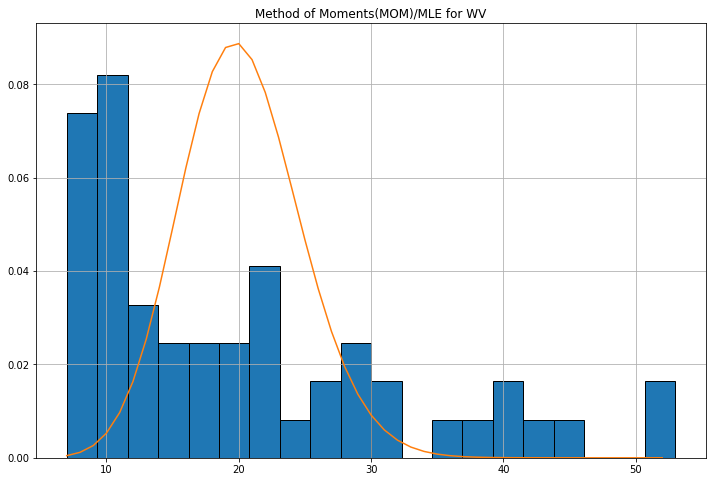

In [262]:
wv_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
#setting min and max as scale
x = np.arange(7, 53)
pmf=poisson.pmf(x,mu=wv_data_mean)
plt.plot(x, pmf)
plt.title("Method of Moments(MOM)/MLE for WV")

Text(0.5, 1.0, 'KDE for WV data')

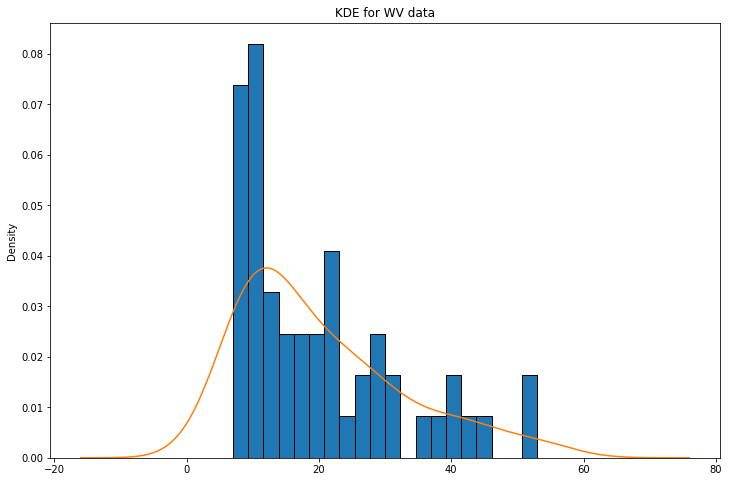

In [263]:
wv_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
wv_data['Norm_Deaths'].plot.kde()
plt.title("KDE for WV data")

Text(0.5, 1.0, 'MLe,MOM,KDE for WV, red curve indicates the KDE')

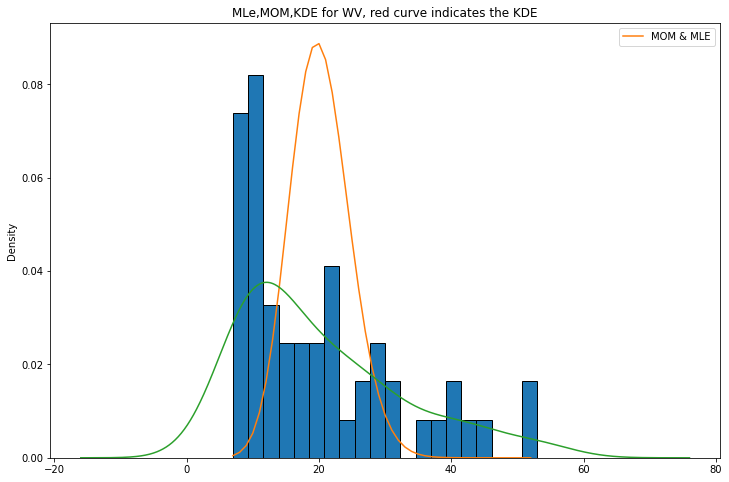

In [264]:
wv_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.arange(7, 53)#setting min and max as scale
pmf=poisson.pmf(x,mu=wv_data_mean)

l1,=plt.plot(x, pmf,label='MOM & MLE')
wv_data['Norm_Deaths'].plot.kde()
plt.legend(handles=[l1])
plt.title("MLe,MOM,KDE for WV, red curve indicates the KDE")

##### From the above graph we can see that MOM/MLE can be considered as the right fit curve for wv data


###### Analysing the best fit curve for nm data

Text(0.5, 1.0, 'Method of Moments(MOM)/MLE for NM')

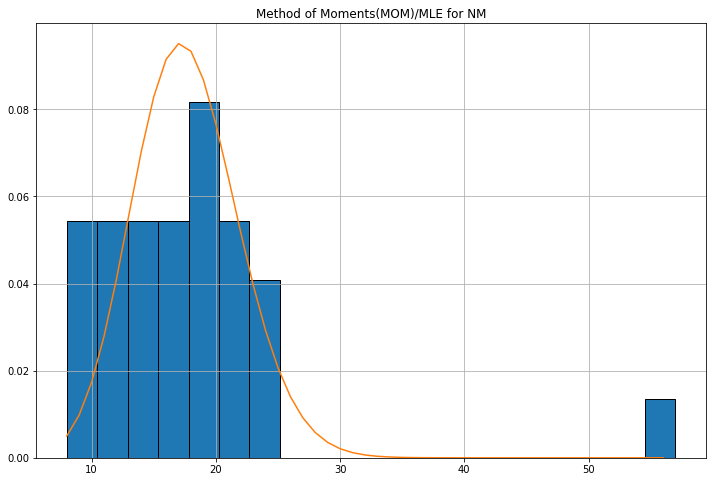

In [265]:
nm_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.arange(8, 57)#setting min and max as scale
pmf=poisson.pmf(x,mu=nm_data_mean)
plt.plot(x, pmf)
plt.title("Method of Moments(MOM)/MLE for NM")

Text(0.5, 1.0, 'KDE for NM data')

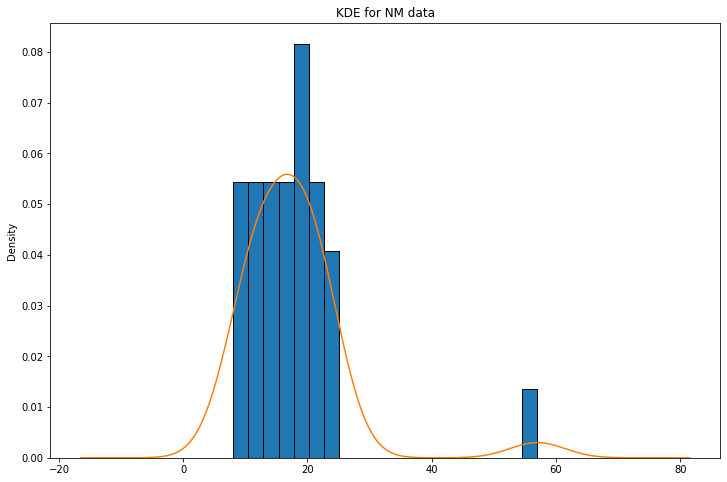

In [266]:
nm_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
nm_data['Norm_Deaths'].plot.kde()
plt.title("KDE for NM data")

Text(0.5, 1.0, 'MLe,MOM,KDE for NM, red curve indicates the KDE')

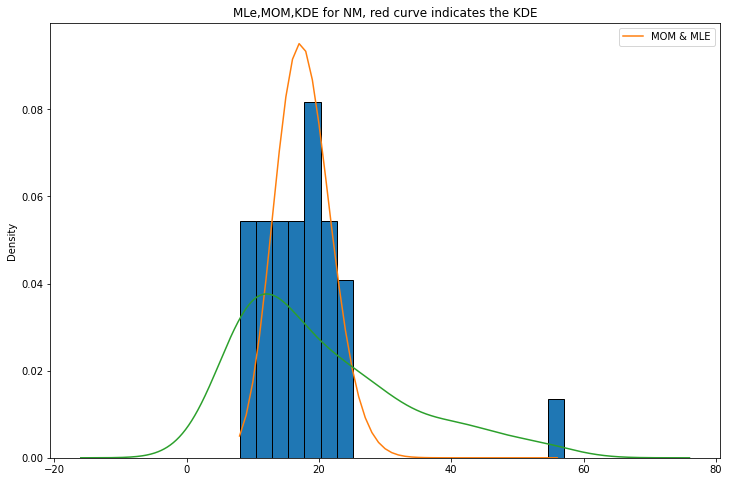

In [267]:
nm_data.Norm_Deaths.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.arange(8, 57)#setting min and max as scale
pmf=poisson.pmf(x,mu=nm_data_mean)

l1,=plt.plot(x, pmf,label='MOM & MLE')
wv_data['Norm_Deaths'].plot.kde()
plt.legend(handles=[l1])
plt.title("MLe,MOM,KDE for NM, red curve indicates the KDE")

###### From the above curve we can see that MOM/MLE performs better and can be considered a bestfit.

###### Since,for both the wv data and nm data, we can consider mom/mle data as the best-fit data, we can plot both of them in a single graph as follows: 

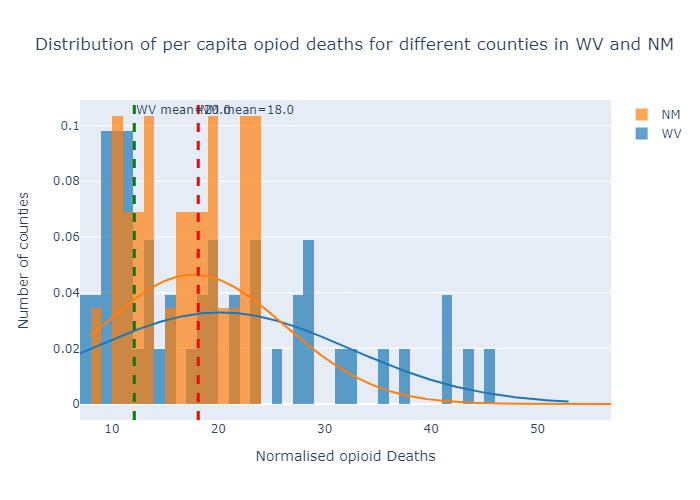

In [285]:
import plotly.graph_objects as go

hist_data = [wv_data['Norm_Deaths'],nm_data['Norm_Deaths']]
group_labels = ['WV','NM']


# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_rug=False,curve_type="normal")


fig.add_vline(nc_data_mean, line_width=3, line_dash="dash", line_color="green",name="Mean",annotation_text="WV mean="+str(np.round(wv_data_mean)))
fig.add_vline(ky_data_mean, line_width=3, line_dash="dash", line_color="red",name="Mean",annotation_text="NM mean="+str(np.round(nm_data_mean)))

# Add title
fig.update_layout(title_text='Distribution of per capita opiod deaths for different counties in WV and NM',xaxis_title="Normalised opioid Deaths",
    yaxis_title="Number of counties")
fig.show("png")

#### Task 2: Hypothesis Testing and Regression (50 pts)     
- Member: (50 pts)
    - **M2.1** Formulate Hypothesis for 5 identified variables in Stage 1 and test the hypothesis (25 pts)
        - For example, if your variable was `Premature death raw value`, divide the observations into two categories, high and low
            - Compare the distributions for a hypothesis test.
        - Formally state the Null and Alternative Hypothesis
        - Define the type of hypothesis and the thresholds
        - Conduct the test and discuss the results for all 5 variables



##### The 5 variables selected in the stage-1 of the project were-
1-Excessive drinking raw value
<br>2-Sexually transmitted infections raw value
<br>3-Preventable hospital stays raw value
<br>4-Mental health providers raw value
<br>5-Premature death raw value

In [117]:
testdf=superdf[['State','Norm_Deaths','County','Population','Excessive drinking raw value','Sexually transmitted infections raw value','Preventable hospital stays raw value','Mental health providers raw value','Premature death raw value','Opiod_Dispensing_Rate']]
testdf

,State,Norm_Deaths,County,Population,Excessive drinking raw value,Sexually transmitted infections raw value,Preventable hospital stays raw value,Mental health providers raw value,Premature death raw value,Opiod_Dispensing_Rate
0,SC,7.0,"Abbeville County, SC",535389,0.156044,328.9,2481.0,0.000607,9517.898548,32.4
1,LA,8.0,"Acadia Parish, LA",1279727,0.190483,564.1,7124.0,0.000783,10194.322670,32.2
2,VA,7.0,"Accomack County, VA",726189,0.151416,746.1,4745.0,0.000953,10459.767290,19.4
3,ID,9.0,"Ada County, ID",8083452,0.193106,420.1,2386.0,0.002741,5027.391209,60.8
4,KY,11.0,"Adair County, KY",387950,0.145439,257.5,5036.0,0.001848,9140.796987,71.3
...,...,...,...,...,...,...,...,...,...,...
2525,CA,8.0,"Yuba County, CA",1468094,0.186822,343.7,4842.0,0.001908,9470.154220,32.1
2526,AK,11.0,"Yukon-Koyukuk Census Area, AK",129587,0.191837,1210.9,1880.0,0.000932,19307.389470,1.2
2527,AZ,10.0,"Yuma County, AZ",3964172,0.154824,529.2,3861.0,0.000540,5834.212268,24.6
2528,TX,6.0,"Zapata County, TX",284033,0.145729,243.5,5864.0,0.000000,6770.768596,3.8


#### Let us begin formulating the hypothesis by comparing each attribute to a target variable i.e the opiod moratlity rate. 

* First we need to normalise each of the column with population per 100,000 so that the scale of comaprission is the same.
* Next, we need formulate the hypothesis and then perform a two-sample t-test because we will be analysing two independent variables. 

In [118]:
testdf["Norm_Drinking"] = (testdf["Excessive drinking raw value"]/testdf["Population"])*100000
testdf["Norm_sexual"] = (testdf["Sexually transmitted infections raw value"]/testdf["Population"])*100000
testdf["Norm_hospital"] = (testdf["Preventable hospital stays raw value"]/testdf["Population"])*100000
testdf["Norm_mental"] = (testdf["Mental health providers raw value"]/testdf["Population"])*100000
testdf["Norm_premature"] = (testdf["Premature death raw value"]/testdf["Population"])*100000
testdf["Norm_disp"] = (testdf["Opiod_Dispensing_Rate"]/testdf["Population"])*100000
testdf

<ipython-input-118-f67481102e27>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-f67481102e27>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-f67481102e27>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-f67

,State,Norm_Deaths,County,Population,Excessive drinking raw value,Sexually transmitted infections raw value,Preventable hospital stays raw value,Mental health providers raw value,Premature death raw value,Opiod_Dispensing_Rate,Norm_Drinking,Norm_sexual,Norm_hospital,Norm_mental,Norm_premature,Norm_disp
0,SC,7.0,"Abbeville County, SC",535389,0.156044,328.9,2481.0,0.000607,9517.898548,32.4,0.029146,61.431968,463.401377,0.000113,1777.753848,6.051675
1,LA,8.0,"Acadia Parish, LA",1279727,0.190483,564.1,7124.0,0.000783,10194.322670,32.2,0.014885,44.079714,556.681230,0.000061,796.601359,2.516162
2,VA,7.0,"Accomack County, VA",726189,0.151416,746.1,4745.0,0.000953,10459.767290,19.4,0.020851,102.741848,653.411164,0.000131,1440.364325,2.671481
3,ID,9.0,"Ada County, ID",8083452,0.193106,420.1,2386.0,0.002741,5027.391209,60.8,0.002389,5.197037,29.517092,0.000034,62.193617,0.752154
4,KY,11.0,"Adair County, KY",387950,0.145439,257.5,5036.0,0.001848,9140.796987,71.3,0.037489,66.374533,1298.105426,0.000476,2356.179143,18.378657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,CA,8.0,"Yuba County, CA",1468094,0.186822,343.7,4842.0,0.001908,9470.154220,32.1,0.012725,23.411307,329.815393,0.000130,645.064568,2.186508
2526,AK,11.0,"Yukon-Koyukuk Census Area, AK",129587,0.191837,1210.9,1880.0,0.000932,19307.389470,1.2,0.148037,934.430151,1450.762808,0.000719,14899.171576,0.926019
2527,AZ,10.0,"Yuma County, AZ",3964172,0.154824,529.2,3861.0,0.000540,5834.212268,24.6,0.003906,13.349572,97.397388,0.000014,147.173540,0.620558
2528,TX,6.0,"Zapata County, TX",284033,0.145729,243.5,5864.0,0.000000,6770.768596,3.8,0.051307,85.729475,2064.548838,0.000000,2383.796459,1.337873


* Calculate a threshold for each of the selected 5 variables.
* We set a standard way to set the threshold which is calculated as (min+max)/2.

In [74]:
death_threshold=(testdf['Norm_Deaths'].min()+testdf['Norm_Deaths'].max())/2
print("Death-rate Threshold",death_threshold)

drink_threshold=(testdf['Norm_Drinking'].min()+testdf['Norm_Drinking'].max())/2
print("Drink Threshold",drink_threshold)

sexual_threshold=(testdf['Norm_sexual'].min()+testdf['Norm_sexual'].max())/2
print("Sexual threshold",sexual_threshold)

hospital_threshold=(testdf['Norm_hospital'].min()+testdf['Norm_hospital'].max())/2
print("Hospital threshold",hospital_threshold)

mental_threshold=(testdf['Norm_mental'].min()+testdf['Norm_mental'].max())/2
print("Mental threshold",mental_threshold)

premature_threshold=(testdf['Norm_premature'].min()+testdf['Norm_premature'].max())/2
print("Mental threshold",premature_threshold)

Death-rate Threshold 29.0
Drink Threshold 0.13396205075342518
Sexual threshold 665.0270501638447
Hospital threshold 6557.256221900106
Mental threshold 0.008067995525588043
Mental threshold 11141.092263818999


* Values that are less the thresold are set to LOW and the values greater than the threshold are set to HIGH. 

In [75]:
testdf['death_cateory'] = 'High'
testdf.loc[testdf['Norm_Deaths'] < 29.0, 'death_cateory'] = 'Low'

testdf['drinking_cateory'] = 'High'
testdf.loc[testdf['Norm_Drinking'] < 0.13396205075342518, 'drinking_cateory'] = 'Low'

testdf['sexual_cateory'] = 'High'
testdf.loc[testdf['Norm_sexual'] < 665.0270501638447, 'sexual_cateory'] = 'Low'

testdf['hospital_cateory'] = 'High'
testdf.loc[testdf['Norm_hospital'] < 6557.256221900106, 'hospital_cateory'] = 'Low'

testdf['mental_cateory'] = 'High'
testdf.loc[testdf['Norm_mental'] < 0.008067995525588043, 'mental_cateory'] = 'Low'

testdf['premature_cateory'] = 'High'
testdf.loc[testdf['Norm_premature'] < 11141.092263818999, 'premature_cateory'] = 'Low'

testdf

<ipython-input-75-e58aa86f3453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['death_cateory'] = 'High'
<ipython-input-75-e58aa86f3453>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['drinking_cateory'] = 'High'
<ipython-input-75-e58aa86f3453>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,State,Norm_Deaths,County,Population,Excessive drinking raw value,Sexually transmitted infections raw value,Preventable hospital stays raw value,Mental health providers raw value,Premature death raw value,Norm_Drinking,Norm_sexual,Norm_hospital,Norm_mental,Norm_premature,drinking_cateory,death_cateory,sexual_cateory,hospital_cateory,mental_cateory,premature_cateory
0,SC,7.0,"Abbeville County, SC",535389,0.156044,328.9,2481.0,0.000607,9517.898548,0.029146,61.431968,463.401377,0.000113,1777.753848,Low,Low,Low,Low,Low,Low
1,LA,8.0,"Acadia Parish, LA",1279727,0.190483,564.1,7124.0,0.000783,10194.322670,0.014885,44.079714,556.681230,0.000061,796.601359,Low,Low,Low,Low,Low,Low
2,VA,7.0,"Accomack County, VA",726189,0.151416,746.1,4745.0,0.000953,10459.767290,0.020851,102.741848,653.411164,0.000131,1440.364325,Low,Low,Low,Low,Low,Low
3,ID,9.0,"Ada County, ID",8083452,0.193106,420.1,2386.0,0.002741,5027.391209,0.002389,5.197037,29.517092,0.000034,62.193617,Low,Low,Low,Low,Low,Low
4,KY,11.0,"Adair County, KY",387950,0.145439,257.5,5036.0,0.001848,9140.796987,0.037489,66.374533,1298.105426,0.000476,2356.179143,Low,Low,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,CA,8.0,"Yuba County, CA",1468094,0.186822,343.7,4842.0,0.001908,9470.154220,0.012725,23.411307,329.815393,0.000130,645.064568,Low,Low,Low,Low,Low,Low
2526,AK,11.0,"Yukon-Koyukuk Census Area, AK",129587,0.191837,1210.9,1880.0,0.000932,19307.389470,0.148037,934.430151,1450.762808,0.000719,14899.171576,High,Low,High,Low,Low,High
2527,AZ,10.0,"Yuma County, AZ",3964172,0.154824,529.2,3861.0,0.000540,5834.212268,0.003906,13.349572,97.397388,0.000014,147.173540,Low,Low,Low,Low,Low,Low
2528,TX,6.0,"Zapata County, TX",284033,0.145729,243.5,5864.0,0.000000,6770.768596,0.051307,85.729475,2064.548838,0.000000,2383.796459,Low,Low,Low,Low,Low,Low


* Once a theshold is set, we then perform a two-tail ttest to see check if we can accept or reject our NULL hypothesis.
* We comapre the HIGH values across Normalised Moratality rate with the HIGH values across the selected 5 variables.

In [80]:
a=testdf[testdf['death_cateory']=="High"]
a=a[['Norm_Deaths']]
print(a.shape)

a1=testdf[testdf['drinking_cateory']=="High"]
a1=a1.fillna(0.0)
a1=a1[['Norm_Deaths']]
print(a1.shape)

a2=testdf[testdf['sexual_cateory']=="High"]
a2=a2.fillna(0.0)
a2=a2[['Norm_sexual']]
print(a2.shape)

a3=testdf[testdf['hospital_cateory']=="High"]
a3=a3.fillna(0.0)
a3=a3[['Norm_hospital']]
print(a3.shape)

a4=testdf[testdf['mental_cateory']=="High"]
a4=a4.fillna(0.0)
a4=a4[['Norm_mental']]
print(a4.shape)

a5=testdf[testdf['premature_cateory']=="High"]
a5=a5.fillna(0.0)
a5=a5[['Norm_premature']]
print(a5.shape)

(40, 1)
(39, 1)
(13, 1)
(15, 1)
(5, 1)
(20, 1)


* Next, We comapre the Low values across Normalised Moratality rate with the Low values across the selected 5 variables.

In [81]:
b=testdf[testdf['death_cateory']=="Low"]
b=b[['Norm_Deaths']]
print(b.shape)

b1=testdf[testdf['drinking_cateory']=="Low"]
b1=b1.fillna(0.0)
b1=b1[['Norm_Deaths']]
print(b1.shape)

b2=testdf[testdf['sexual_cateory']=="Low"]
b2=b2.fillna(0.0)
b2=b2[['Norm_sexual']]
print(b2.shape)

b3=testdf[testdf['hospital_cateory']=="Low"]
b3=b3.fillna(0.0)
b3=b3[['Norm_hospital']]
print(b3.shape)

b4=testdf[testdf['mental_cateory']=="Low"]
b4=b4.fillna(0.0)
b4=b4[['Norm_mental']]
print(b4.shape)

b5=testdf[testdf['premature_cateory']=="Low"]
b5=b5.fillna(0.0)
b5=b5[['Norm_premature']]
print(b5.shape)

(2490, 1)
(2491, 1)
(2517, 1)
(2515, 1)
(2525, 1)
(2510, 1)


* From the generated results, we can see that each dataframe is of different size, yet it possible to perform the t-test.

In [85]:
from scipy.stats import ttest_ind
import numpy as np
#import pingouin as pg

print("T-Test results for high mortality in comaprission with higher excessive drinking raw value\n",ttest_ind(a=a, b=a1,equal_var=False))
print("\n")
print("T-Test results for Low mortality in comaprission with lower excessive drinking raw value\n",ttest_ind(a=b, b=b1,equal_var=False))
print("-----------------------------------------------------------------------------------")
print("T-Test results for high mortality in comaprission with higher Sexually transmitted infections raw value\n",ttest_ind(a=a, b=a2,equal_var=False))
print("\n")
print("T-Test results for Low mortality in comaprission with lower Sexually transmitted infections raw value\n",ttest_ind(a=b, b=b2,equal_var=False))
print("-----------------------------------------------------------------------------------")
print("T-Test results for high mortality in comaprission with higher Preventable hospital stays raw value\n",ttest_ind(a=a, b=a3,equal_var=False))
print("\n")
print("T-Test results for Low mortality in comaprission with lower Preventable hospital stays raw value\n",ttest_ind(a=b, b=b3,equal_var=False))
print("-----------------------------------------------------------------------------------")
print("T-Test results for high mortality in comaprission with higher Mental health providers raw value\n",ttest_ind(a=a, b=a4,equal_var=False))
print("\n")
print("T-Test results for Low mortality in comaprission with lower Mental health providers raw value\n",ttest_ind(a=b, b=b4,equal_var=False))
print("-----------------------------------------------------------------------------------")
print("T-Test results for high mortality in comaprission with higher Premature death raw value\n",ttest_ind(a=a, b=a5,equal_var=False))
print("\n")
print("T-Test results for Low mortality in comaprission with lower Premature death raw value\n",ttest_ind(a=b, b=b5,equal_var=False))
print("-----------------------------------------------------------------------------------")

T-Test results for high mortality in comaprission with higher excessive drinking raw value
 Ttest_indResult(statistic=array([17.06959616]), pvalue=array([3.2927028e-25]))


T-Test results for Low mortality in comaprission with lower excessive drinking raw value
 Ttest_indResult(statistic=array([-2.34155595]), pvalue=array([0.01924396]))
-----------------------------------------------------------------------------------
T-Test results for high mortality in comaprission with higher Sexually transmitted infections raw value
 Ttest_indResult(statistic=array([-4.69200933]), pvalue=array([0.00052122]))


T-Test results for Low mortality in comaprission with lower Sexually transmitted infections raw value
 Ttest_indResult(statistic=array([-36.81339527]), pvalue=array([3.82114686e-238]))
-----------------------------------------------------------------------------------
T-Test results for high mortality in comaprission with higher Preventable hospital stays raw value
 Ttest_indResult(statistic

### Since for all the 5 variables,low and high, the p value is lesser than 0.05 we fail to accept the null hypothesis and the alternate hypothesis holds true.

<b>1) For excessive drinking raw value:</b>
  - H0: Across any state in the US, mean of excessive drinking rate similar to mean of the opiod mortality rate <br>
  - H1:  Across any state in the US, there is significant difference between the means of excessive drinking rate and opiod mortality rate 
      - The threshold set is (max+min)/2=0.13396205075342518
      - The hypothesis test performed is two-sample T-test
      - Result: Reject the Null hypothesis.<br>
<b>2) For Sexually transmitted infections raw value:</b>
  - H0: Across any state in the US, mean of Sexually transmitted infections raw value is similar to mean of the opiod mortality rate <br>
  - H1:  Across any state in the US, there is significant difference between the means of Sexually transmitted infections raw value rate and opiod mortality rate 
      - The threshold set is (max+min)/2=665.0270501638447
      - The hypothesis test performed is two-sample T-test
      - Result: Reject the Null hypothesis.
<br>
<b>3) For Preventable hospital stays raw value:</b>
  - H0: Across any state in the US, mean of Preventable hospital stays raw value is similar to mean of the opiod mortality rate <br>
  - H1:  Across any state in the US, there is significant difference between the means of Preventable hospital stays raw value rate and opiod mortality rate 
      - The threshold set is (max+min)/2=6557.256221900106
      - The hypothesis test performed is two-sample T-test
      - Result: Reject the Null hypothesis.
<br>
<b>4) For Mental health providers raw value:</b>
  - H0: Across any state in the US, mean of Mental health providers raw value is similar to mean of the opiod mortality rate <br>
  - H1:  Across any state in the US, there is significant difference between the means of Mental health providers raw value rate and opiod mortality rate 
      - The threshold set is (max+min)/2=0.008067995525588043
      - The hypothesis test performed is two-sample T-test
      - Result: Reject the Null hypothesis.
<br>
<b>5) For Premature death raw value:</b>
  - H0: Across any state in the US, mean of Premature death raw value is similar to mean of the opiod mortality rate <br>
  - H1:  Across any state in the US, there is significant difference between the means of Premature death raw value rate and opiod mortality rate 
      - The threshold set is (max+min)/2=11141.092263818999
      - The hypothesis test performed is two-sample T-test
      - Result: Reject the Null hypothesis.
<br>

 - **M2.2** Perform linear regression to discover patterns (25 pts)
         - Perform a linear regression between Normalized Mortality and `Opiod_Dispensing_Rate`
             - Normalize the `Opiod_Dispensing_Rate` to the population
         - Perform multiple linear regression model with your 5 variables and `Opiod_Dispensing_Rate`
             - Evaluate the results and describe them.
         - Test non-linear model with the 5 + 1 variables (n=2,3,4)
             - Evaluate the results and describe them.

* First we need to normalise the Opiod_Dispensing_Rate by population 

In [274]:
superdf["Norm_disp"] = (superdf["Opiod_Dispensing_Rate"]/superdf["Population"])*100000
superdf.head()

,Unnamed: 0,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,FIPS,Opiod_Dispensing_Rate,Norm_disp
0,0,"Abbeville County, SC",45001,535389,38,7.0,45.0,1.0,45001.0,SC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45001.0,32.4,6.051675
1,1,"Acadia Parish, LA",22001,1279727,98,8.0,22.0,1.0,22001.0,LA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22001.0,32.2,2.516162
2,2,"Accomack County, VA",51001,726189,50,7.0,51.0,1.0,51001.0,VA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51001.0,19.4,2.671481
3,3,"Ada County, ID",16001,8083452,692,9.0,16.0,1.0,16001.0,ID,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16001.0,60.8,0.752154
4,4,"Adair County, KY",21001,387950,43,11.0,21.0,1.0,21001.0,KY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21001.0,71.3,18.378657


In [275]:
#Filling the NAN values with 0
superdf['Norm_disp']=superdf['Norm_disp'].fillna(0.0)

### Linear regression between the Normalized Mortality and Opiod_Dispensing_Rate

* Performing a linear regression between the Noramlised mortality rate and the opioid dispensing rate.

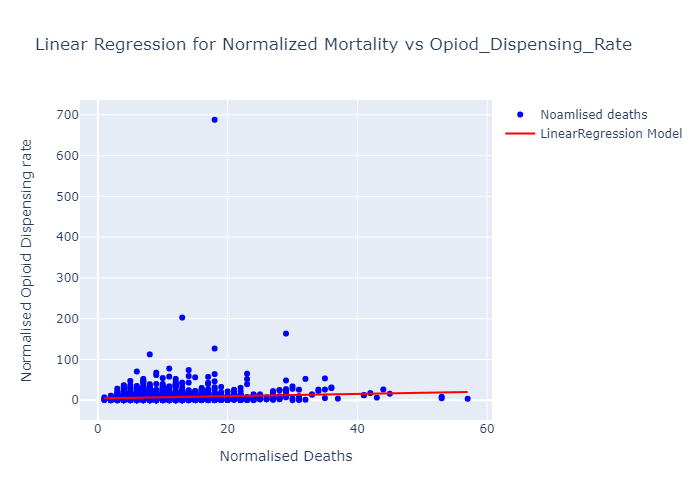

In [284]:
from sklearn.linear_model import LinearRegression

df= superdf[['Norm_Deaths','Norm_disp']]

#x becomes the Norm_Deaths and y becomes Norm_disp
x = df.iloc[:,0].values.reshape(-1, 1) 
y = df.iloc[:,1].values.reshape(-1, 1)

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

y_pred=lm.predict(x.reshape(-1,1))
fig = go.Figure([
go.Scatter(x=x.squeeze(),y=y.squeeze(),name='Noamlised deaths',mode='markers',marker=dict(color='blue')),
go.Scatter(x=x.squeeze(),y=y_pred.squeeze(),name='LinearRegression Model',mode='lines',marker=dict(color='red'))])
fig.update_layout(title='Linear Regression for Normalized Mortality vs Opiod_Dispensing_Rate', xaxis_title="Normalised Deaths",
    yaxis_title="Normalised Opioid Dispensing rate")
fig.show("png")

<b>From, the above generated graph we can see that there a linear relationship between opioid morality rate and the opioid dispensing rate.</b>

- Perform multiple linear regression model with your 5 variables and `Opiod_Dispensing_Rate`
      - Evaluate the results and describe them.
      
##### To perform a multiple linear regression model, we fit the data with the 5 variables and use the opioid dispensing rate as the target variable.

In [276]:
#first we set all the nan values to 0
testdf=testdf.fillna(0.0)

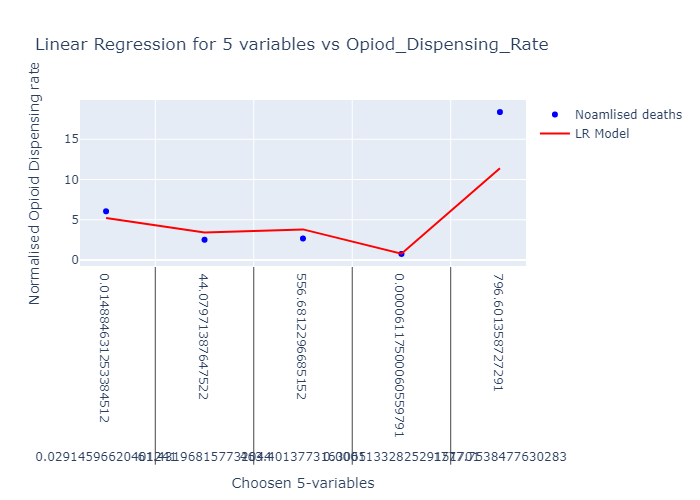

In [283]:
df= testdf[['Norm_Drinking','Norm_sexual','Norm_hospital','Norm_mental','Norm_premature','Norm_disp']]

#x becomes the Norm_Deaths and y becomes Norm_disp
x = df.iloc[:,0:5] 
y = df.iloc[:,-1:]


lm=LinearRegression()
lm.fit(x,y)

y_pred=lm.predict(x)
fig = go.Figure([
go.Scatter(x=x.squeeze(),y=y.squeeze(),name='Noamlised deaths',mode='markers',marker=dict(color='blue')),
go.Scatter(x=x.squeeze(),y=y_pred.squeeze(),name='LR Model',mode='lines',marker=dict(color='red'))])
fig.update_layout(title='Linear Regression for 5 variables vs Opiod_Dispensing_Rate', xaxis_title="Choosen 5-variables",
    yaxis_title="Normalised Opioid Dispensing rate")
fig.show("png")

In [156]:
print("RMSE score for multiple linear regression: ",np.sqrt(metrics.mean_squared_error(y,y_pred)))
print("R-squared value:",metrics.r2_score(y,y_pred))

RMSE score for multiple linear regression:  14.760761738406782
R-squared value: 0.24644317140642225


* The square root of the variance of the residuals is represented by the RMSE error- which is approximately 15, we can say that the model performed well but not did a great job in predicting the opioid mortality rate when the 5 variables are given.
* Since, R2 value is less than half i.e less than 0.5 we can say that the model does not do a good job in explaining the proportion of the variance between the depenedent and independent variable.

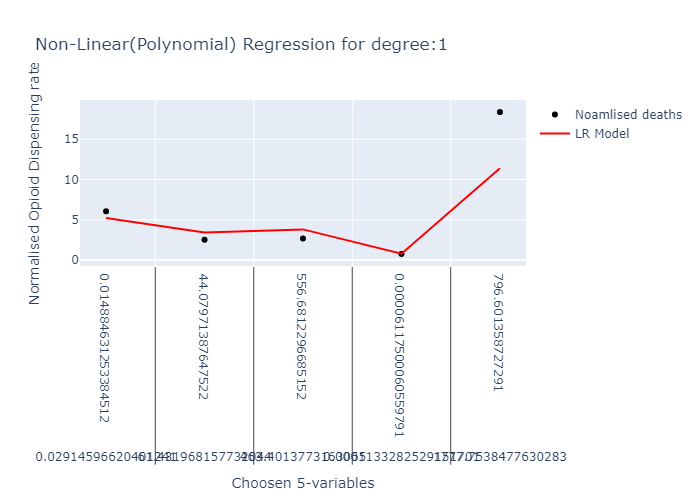

RMSE score for multiple linear regression for degree:1 	 14.760761738406782
R-squared value for degree:1 	 0.24644317140642213


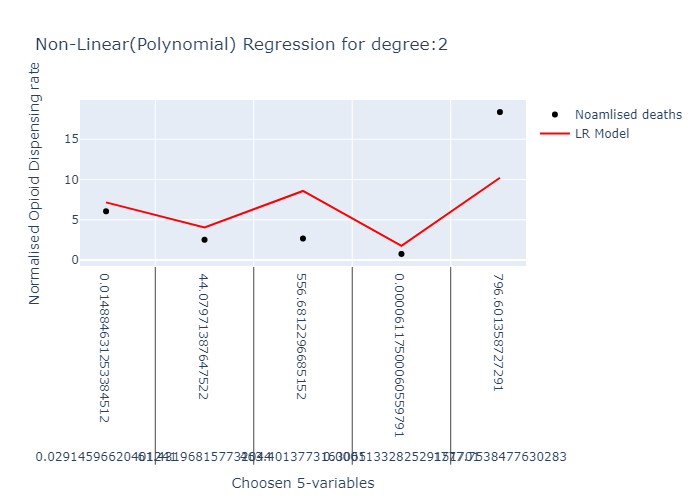

RMSE score for multiple linear regression for degree:2 	 12.485227815405297
R-squared value for degree:2 	 0.4608725907118788


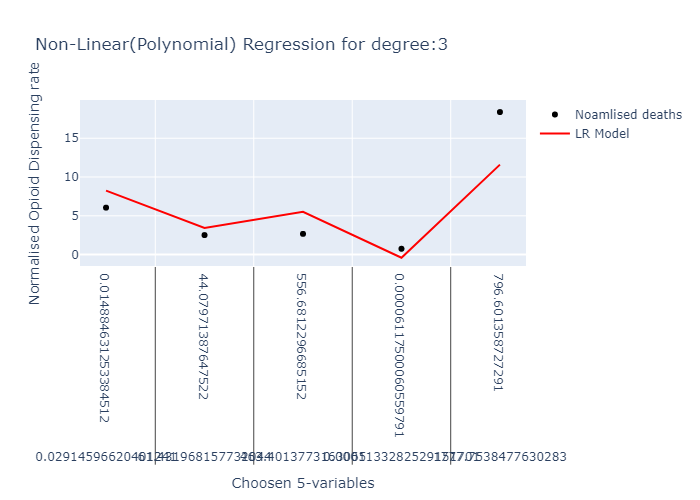

RMSE score for multiple linear regression for degree:3 	 7.85071603644558
R-squared value for degree:3 	 0.7868344556440677


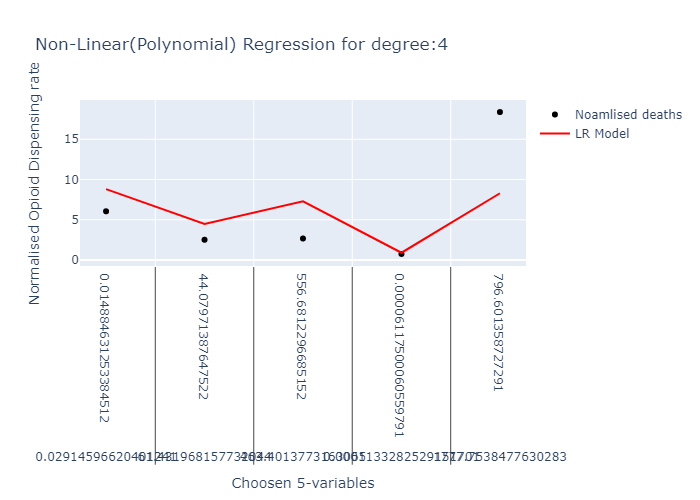

RMSE score for multiple linear regression for degree:4 	 6.765188282082652
R-squared value for degree:4 	 0.8417082627869036


In [282]:
df= testdf[['Norm_Drinking','Norm_sexual','Norm_hospital','Norm_mental','Norm_premature','Norm_disp']]

#x becomes the 5 variables and y becomes Norm_disp
x = df.iloc[:,0:5] 
y = df.iloc[:,-1:]

lin = LinearRegression()
lin.fit(x, y)

from sklearn.preprocessing import PolynomialFeatures

for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(x)

    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly, y)
    y_pred=lin2.predict(poly.fit_transform(x))

    fig = go.Figure([
    go.Scatter(x=x.squeeze(),y=y.squeeze(),name='Noamlised deaths',mode='markers',marker=dict(color='black')),
    go.Scatter(x=x.squeeze(),y=y_pred.squeeze(),name='LR Model',mode='lines',marker=dict(color='red'))])

    fig.update_layout(title='Non-Linear(Polynomial) Regression for degree:'+str(i), xaxis_title="Choosen 5-variables",
        yaxis_title="Normalised Opioid Dispensing rate")
    fig.show("png")
    print("RMSE score for multiple linear regression for degree:"+str(i),"\t",np.sqrt(metrics.mean_squared_error(y,y_pred)))
    print("R-squared value for degree:"+str(i),"\t",metrics.r2_score(y,y_pred))

- For degree-1:
    - RMSE score for multiple linear regression for degree:1 	 14.760761738406782
    - R-squared value for degree:1 	 0.24644317140642213
- For degree-2:
    - RMSE score for multiple linear regression for degree:2 12.485227815405297
    - R-squared value for degree:2 0.4608725907118788
- For degree-3:
     - RMSE score for multiple linear regression for degree:3 	 7.85071603644558
     - R-squared value for degree:3 	 0.7868344556440677
- For degree-4:
    - RMSE score for multiple linear regression for degree:4 	 6.765188282082652
    - R-squared value for degree:4 	 0.8417082627869036
    
###### From the above generated results we can see that the RMSE error is the lowest for degree-4 and the r-squared value is also the highest for degree-4 polynomial regression.Hence we can say that the model performs the best for the degree-4 polynomial regression.

### References:

* https://github.com/UNCG-CSE/CSC-605_Fall_2022/blob/main/Class_Resources/Lecture_06/Statistics/07_linear_regression.ipynb
* https://stackoverflow.com/questions/70328489/create-plotly-distplot-charts-in-plotly-express
* https://stackoverflow.com/questions/63865209/plotly-how-to-show-both-a-normal-distribution-and-a-kernel-density-estimation-i
* https://pyshark.com/poisson-distribution-and-poisson-process-in-python/
* https://plotly.com/python/distplot/
* https://www.youtube.com/watch?v=kXBQrPcDYDk